<a href="https://colab.research.google.com/github/NaithaniAR/NYC-Taxi-Trip-Time-Prediction---Capstone-Project.ipynb/blob/main/NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Importing  libraries

 Importing important libraries for analysis and visualisation 

In [ ]:
pip install matplotlib==3.1.3


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt
import statsmodels.formula.api as sm
%matplotlib inline
import calendar


Libraries for machine learning 

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/personal /df.csv',parse_dates=['pickup_datetime','dropoff_datetime'])

#To suppres scientific notation.
pd.options.display.float_format = '{:.2f}'.format 

pd.set_option('display.max_columns', None)

# **Data Exploration**
We will explore the data and modify dataset as per the our requirment for the further analysis of the problem.

In [ ]:
df.head()

,Unnamed: 0,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Distance
0,0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.98,40.77,-73.96,40.77,N,455,1.22
1,1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.98,40.74,-74.00,40.73,N,663,1.33
2,2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.98,40.76,-74.01,40.71,N,2124,2.10
3,3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.01,40.72,-74.01,40.71,N,429,0.30
4,4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.97,40.79,-73.97,40.78,N,435,0.20


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1354583 entries, 0 to 1354582
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype         
---  ------              --------------    -----         
 0   Unnamed: 0          1354583 non-null  int64         
 1   id                  1354583 non-null  object        
 2   vendor_id           1354583 non-null  int64         
 3   pickup_datetime     1354583 non-null  datetime64[ns]
 4   dropoff_datetime    1354583 non-null  datetime64[ns]
 5   passenger_count     1354583 non-null  int64         
 6   pickup_longitude    1354583 non-null  float64       
 7   pickup_latitude     1354583 non-null  float64       
 8   dropoff_longitude   1354583 non-null  float64       
 9   dropoff_latitude    1354583 non-null  float64       
 10  store_and_fwd_flag  1354583 non-null  object        
 11  trip_duration       1354583 non-null  int64         
 12  Distance            1354583 non-null  float64       
dtypes: datetime6

In [ ]:
df.drop('Unnamed: 0',inplace=True,axis=1)

In [ ]:
#df.reset_index(inplace=True)

In [ ]:
print("The shape of our dataset is :",(df.shape))

The shape of our dataset is : (1354583, 12)


In [ ]:
#Check count of unique id's in the dataset


print("There are %d unique id's in our dataset, which is equal to the number of records"%(df.id.nunique()))

There are 1354583 unique id's in our dataset, which is equal to the number of records


In [ ]:
#Check for NaN values


df.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
Distance              0
dtype: int64

Calculate and assign new columns to the dataframe such as weekday,
month and pickup_hour which will help us to gain more insights from the data.

# Feature Engineering

### **Distance:**

[**Haversine Distance :**](https://pypi.org/project/haversine/)
The majority of geospatial analysts agree that this is the appropriate distance to use for Earth distances and is argued to be more accurate over longer distances compared to Euclidean distance.

Performance is faster in computing compared to other great circle distance formulas such as [Vincenty Formula](https://pypi.org/project/vincenty/)


Manhattan Distance

**The Manhattan Distance :** *is a measure of the distance between two points that take into account the perpendicular layout of the map. It is called Manhattan distance because Manhattan is known for its grid or block layout where streets intersect at right angles*. [For more info](https://towardsdatascience.com/spatial-distance-and-machine-learning-2cab72fc6284)

In [ ]:
#we will use Haversine distance to calculate the distance between two points. 


def haversine_distance(lat1, lon1, lat2, lon2):
  p = 0.017453292519943295 # Pi/180
  a = 0.5 - np.cos((lat2 - lat1) * p)/2 + np.cos(lat1 * p) * np.cos(lat2 * p) * (1 - np.cos((lon2 - lon1) * p))/2
  return 0.6213712 * 12742 * np.arcsin(np.sqrt(a))

In [ ]:
df["haversine_distance"] = haversine_distance(df["pickup_latitude"], df["pickup_longitude"], 
                                      df["dropoff_latitude"], df["dropoff_longitude"])

In [ ]:
def manhattan_distance(lat1, lng1, lat2, lng2):
    # km 
    a = haversine_distance(lat1, lng1, lat1, lng2)
    b = haversine_distance(lat1, lng1, lat2, lng1)
    return a + b


In [ ]:
df["manhattan_distance"] = manhattan_distance(df["pickup_latitude"], df["pickup_longitude"], 
                                      df["dropoff_latitude"], df["dropoff_longitude"])

In [ ]:
df.head(1)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,Distance,haversine_distance,manhattan_distance
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.98,40.77,-73.96,40.77,N,455,1.22,0.93,1.08


We observe the Minimum **driving distance** for our first observation according to google is [1.5 miles](https://www.google.com/maps/dir/'40.77,-73.98'/'40.77,-73.96'/@40.7689841,-73.9738618,15z/data=!4m13!4m12!1m5!1m1!1s0x0:0xb0aac0a0d6383216!2m2!1d-73.98!2d40.77!1m5!1m1!1s0x0:0x778ea6368195c8d2!2m2!1d-73.96!2d40.77), when compared to distance that we [calculated earlier](https://github.com/NaithaniAR/NYC-Taxi-Trip-Time-Prediction---Capstone-Project.ipynb/blob/main/NYC_Taxi_Trip_Driving_Distance.ipynb) with haversine distance and manhatten distance, we observe that osmnx is the most accurate.  

### **Pickup Datetime &  Dropoff Datetime**


*   Date and Time when the meter was disengaged and engaged
*   Extracing Date Time Month Day and Year for further analysis 


In [ ]:
#Date

df['pickup_date']=df['pickup_datetime'].dt.date
df['dropoff_date']=df['dropoff_datetime'].dt.date



#Day


df['pickup_weekday']=df['pickup_datetime'].dt.day_name()
df['dropoff_weekday']=df['dropoff_datetime'].dt.day_name()

#Month

df['pickup_month']=df['pickup_datetime'].dt.month
df['dropoff_month']=df['dropoff_datetime'].dt.month



# Time

df['Pick_Up_time'] = df['pickup_datetime'].dt.time
df['Drop_off_time'] = df['dropoff_datetime'].dt.time

#Year

df['pickup_Year']=df['pickup_datetime'].dt.year
df['dropoff_Year']=df['dropoff_datetime'].dt.year

#Hour
df['pickup_datetime_hour'] = df.pickup_datetime.dt.hour
df['dropoff_datetime_hour'] =df.dropoff_datetime.dt.hour


# Univariate Analysis

### **ID**
*A unique identifier for each trip*

In [ ]:
df['id'].describe()

count       1354583
unique      1354583
top       id2875421
freq              1
Name: id, dtype: object

There are no duplicate values in 'id', with  1458644 unique values 

### Distance 

In [ ]:
df[['Distance','haversine_distance','manhattan_distance' ]].describe()

,Distance,haversine_distance,manhattan_distance
count,1354583.00,1354583.00,1354583.00
mean,1.37,1.68,2.16
std,1.56,1.42,1.82
min,0.00,0.00,0.00
25%,0.51,0.74,0.94
50%,0.90,1.22,1.57
75%,1.58,2.11,2.72
max,14.22,11.47,15.52


In [ ]:
df.shape

(1354583, 26)

In [ ]:
  # remove potential distance outlier 

# Removing the bottom 1 perentile values as distance travelled cannot be equal to zero. 

df = df[ df['Distance'] > df['Distance'].quantile(0.01)]


#df = df[(df['manhattan_distance'] < df['manhattan_distance'].quantile(0.95)) & (df['manhattan_distance'] > df['manhattan_distance'].quantile(0.05))]
 

In [ ]:
df.shape

(1341037, 26)

In [ ]:
1354583-1341037

13546

### Vendor id

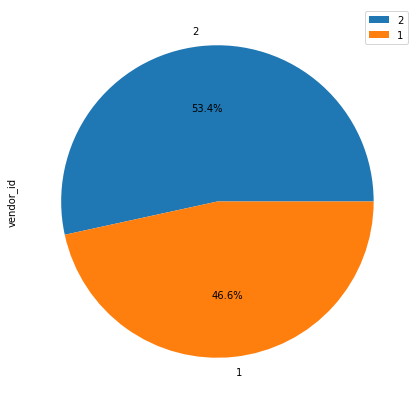

In [ ]:


df['vendor_id'].value_counts().plot.pie(figsize = (7,9), autopct='%1.1f%%')
plt.legend()


We can observe that there are approximately similar percentage on both side 

### **Passenger Count**
The number of passengers in the vehicle (driver entered value)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


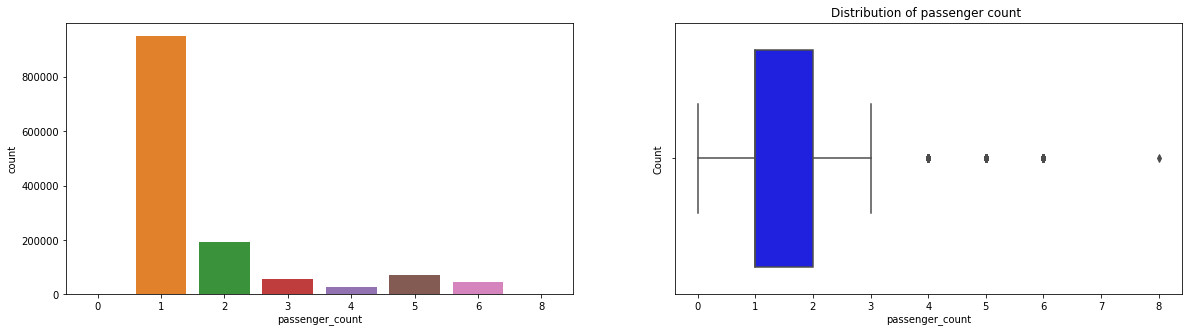

In [ ]:
#Plotting Sub Plot 

fig, axes = plt.subplots(1, 2,figsize=(20,5))

#Plotting bar graph 

sns.countplot(df['passenger_count'],ax=axes[0])
plt.title('Distribution of passenger count ')
plt.xlabel('Passenger')
plt.ylabel('Count')
#Plotting Box Plot

sns.boxplot(df['passenger_count'],color='blue',ax=axes[1])

According to [ Driver Rule 54-15(g)](https://www1.nyc.gov/assets/tlc/downloads/pdf/rule_book_current_chapter_54.pdf) of 'NYC Taxi and Limousine Commission' ,  maximum permissible number of passengers in a taxi is 6. Hence we will drop values which are greater than 6. 

There are some values that are represented by 0, we will drop these values to. because this is clearly a mistake and no further data is available for drawing any conclusions. 

In [ ]:
df.shape

(1341037, 26)

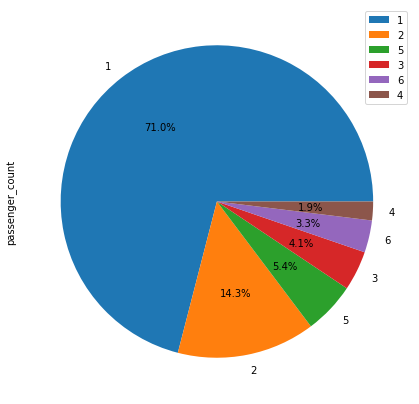

In [ ]:
#Dropping Passenger Count 

df= df[(df['passenger_count']>0) & (df['passenger_count']<=6)]

#Plotting pie chart 

df['passenger_count'].value_counts().plot.pie(figsize = (7,9), autopct='%1.1f%%')
plt.legend()

In [ ]:
df.shape

(1341026, 26)

### Trip Duration


Text(0.5, 1.0, 'Duration Distribution')

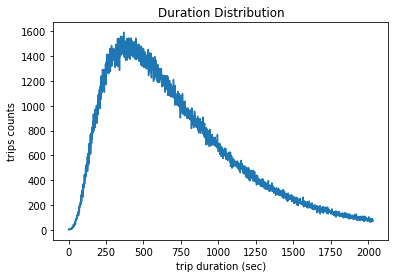

In [ ]:
# trip duration overall distribution 

# taking the 97% Quantile values to remove outliers 

tripduration = df[df.trip_duration < df.trip_duration.quantile(.97)]

#Plotting Trip duration VS Trip_duration.counts

tripduration.groupby('trip_duration').count()['id'].plot()

plt.xlabel('trip duration (sec)')
plt.ylabel('trips counts')
plt.title('Duration Distribution')

In [ ]:
df['trip_duration'].sort_values().tail()

700182      86379
55711       86387
68649       86390
632292    2049578
858347    2227612
Name: trip_duration, dtype: int64


*   Most trips finished within 6-17 minute (400-1000 sec)
*  Some trips take too long/too fast are obvious wrong, maybe because of tech/maunal operation issues, should filter them in following process





In [ ]:
# trip duration should less then 12 hours and greater than 30 seconds normally
      
df = df[(df['trip_duration']  < 12*3600) & (df['trip_duration'] > 30)]

# remove potential  trip duration outlier

df = df[(df['trip_duration'] < df['trip_duration'].quantile(0.99)) & (df['trip_duration'] > df['trip_duration'].quantile(0.01))]

In [ ]:
df.shape

(1311773, 26)

### Speed

In [ ]:
#Calculate Speed 
# Distance obtained is in Miles/hr
df['Avg_speed'] = 3600 * df['Distance'] / df['trip_duration']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


The speed limit set in [USA](https://en.wikipedia.org/wiki/Speed_limits_in_the_United_States) for fastest moterable road is set at 85 miles per hour, and avg walking speed is considered to be 3mph. so limiting our data to this and adding a 50 % margin for overspeeding and traffic jams.

In [ ]:
# Setting speed in a logical range 

df = df[(df['Avg_speed']  < 130) & (df['Avg_speed'] > 1.5)]

# Removing outliers
df = df[(df['Avg_speed'] < df['Avg_speed'].quantile(0.99)) & (df['Avg_speed'] > df['Avg_speed'].quantile(0.01))]

In [ ]:
df.shape

(1242337, 27)

### **store_and_fwd_flag**
 This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0, 0.5, 'Count')

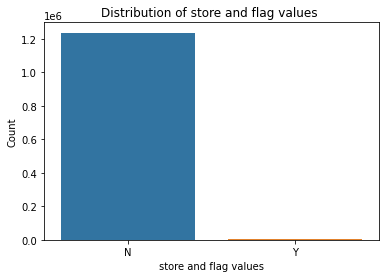

In [ ]:


#Plotting bar graph 

sns.countplot(df['store_and_fwd_flag'])
plt.title('Distribution of store and flag values ')
plt.xlabel('store and flag values')
plt.ylabel('Count')


# Bivariate analysis

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1242337 entries, 0 to 1354582
Data columns (total 27 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   id                     1242337 non-null  object        
 1   vendor_id              1242337 non-null  int64         
 2   pickup_datetime        1242337 non-null  datetime64[ns]
 3   dropoff_datetime       1242337 non-null  datetime64[ns]
 4   passenger_count        1242337 non-null  int64         
 5   pickup_longitude       1242337 non-null  float64       
 6   pickup_latitude        1242337 non-null  float64       
 7   dropoff_longitude      1242337 non-null  float64       
 8   dropoff_latitude       1242337 non-null  float64       
 9   store_and_fwd_flag     1242337 non-null  object        
 10  trip_duration          1242337 non-null  int64         
 11  Distance               1242337 non-null  float64       
 12  haversine_distance     12423

We have added new colums, we can use these colums to analyse our data further and perform bivariate analysis 

### Pickup date & Dropoff date

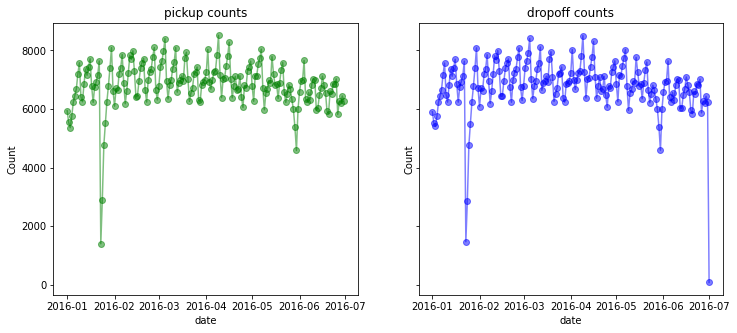

In [ ]:
fig, ax = plt.subplots(ncols=2, sharey=True)
fig.set_size_inches(12, 5)

ax[0].plot(df.groupby('pickup_date').count()['id'], 'go-', alpha=0.5)
ax[1].plot(df.groupby('dropoff_date').count()['id'], 'bo-', alpha=0.5)

ax[0].set(xlabel='date', ylabel='Count',title="pickup counts")
ax[1].set(xlabel='date', ylabel='Count',title="dropoff counts")

plt.show()

In [ ]:
df.groupby('pickup_date').count()['id'].sort_values()

pickup_date
2016-01-23    1404
2016-01-24    2906
2016-05-30    4586
2016-01-25    4772
2016-01-03    5367
              ... 
2016-03-12    8094
2016-02-27    8100
2016-04-16    8283
2016-03-05    8401
2016-04-09    8514
Name: id, Length: 182, dtype: int64

In [ ]:
df.groupby('dropoff_date').count()['id'].sort_values()

dropoff_date
2016-07-01      84
2016-01-23    1473
2016-01-24    2878
2016-05-30    4597
2016-01-25    4770
              ... 
2016-01-30    8086
2016-03-12    8116
2016-04-16    8305
2016-03-05    8407
2016-04-09    8506
Name: id, Length: 183, dtype: int64

We observe that daily Drop Off vary between 6000 and 1000, values on 26-07-01,2016-01-23,2016-01-24 are considerably low, hence we will drop these observations.

In [ ]:
#Dropping values from Date with abnormal values 
#Remove the 2016-01-23 data since its too less comapre others days, 
    # maybe quality is not good 
df= df[(df.pickup_date != '2016-01-23') ]

df= df[(df.dropoff_date != '2016-01-24') ]
df= df[(df.dropoff_date != '26-07-01') ]

### Passenger Count 

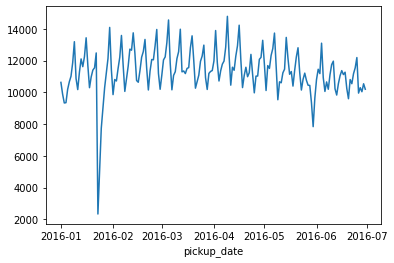

In [ ]:
df.groupby(['pickup_date']).sum()['passenger_count'].plot()


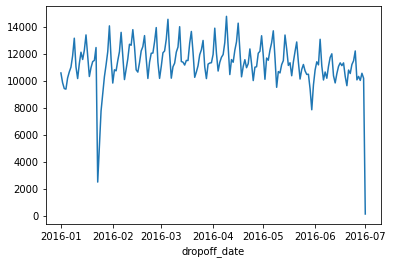

In [ ]:
df.groupby(['dropoff_date']).sum()['passenger_count'].plot()

In [ ]:
df.groupby(['dropoff_date']).sum()['passenger_count'].sort_values()

dropoff_date
2016-07-01      114
2016-01-23     2480
2016-01-24     5087
2016-01-25     7747
2016-05-30     7838
              ...  
2016-03-12    13992
2016-01-30    14054
2016-04-16    14254
2016-03-05    14540
2016-04-09    14760
Name: passenger_count, Length: 183, dtype: int64

In [ ]:
df.groupby(['pickup_date']).sum()['passenger_count'].sort_values()

pickup_date
2016-01-23     2345
2016-01-24     5127
2016-01-25     7743
2016-05-30     7844
2016-01-26     9066
              ...  
2016-03-12    13978
2016-01-30    14091
2016-04-16    14231
2016-03-05    14560
2016-04-09    14789
Name: passenger_count, Length: 182, dtype: int64



*   Passenger count is considerably less on '2016-07-01' , '2016-01-23'  




### Trip Duration VS Hour

A [pivot table](https://pbpython.com/pandas-pivot-table-explained.html) is a table of grouped values that aggregates the individual items of a more extensive table

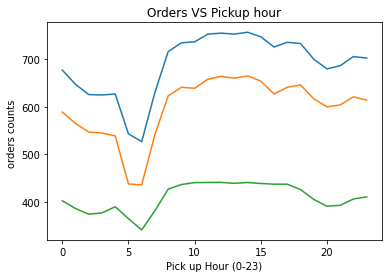

In [ ]:


#tripduration = df_train_[df_train_.trip_duration < df_train_.trip_duration.quantile(.97)]  {As Calculated in section  }


pd.pivot_table(tripduration, index='pickup_datetime_hour' ,aggfunc=np.mean)['trip_duration'].plot(label='mean')
pd.pivot_table(tripduration, index='pickup_datetime_hour' ,aggfunc=np.median)['trip_duration'].plot(label='median')
pd.pivot_table(tripduration, index='pickup_datetime_hour' ,aggfunc=np.std)['trip_duration'].plot(label='std')

#plt.legend(loc=0)
plt.xlabel('Pick up Hour (0-23)')
plt.ylabel('orders counts ')
plt.title('Orders VS Pickup hour')
plt.show()

### store_and_fwd_flag VS  Trip duration 

Text(0, 0.5, 'Trip Duration')

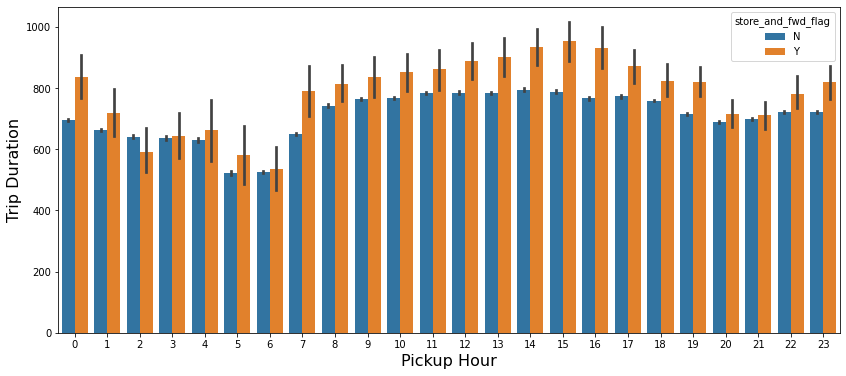

In [ ]:
# Plottong  store_and_fwd_flag VS trip_duration


plt.figure(figsize=(14,6))
sns.barplot(x='pickup_datetime_hour',y='trip_duration',data=df,hue='store_and_fwd_flag')
plt.xlabel('Pickup Hour',fontsize=16)
plt.ylabel('Trip Duration',fontsize=16)

### Trip Duration Vs. Pickup/Dropoff Hour for diffrent months. 

Text(0, 0.5, 'Trip Duration)')

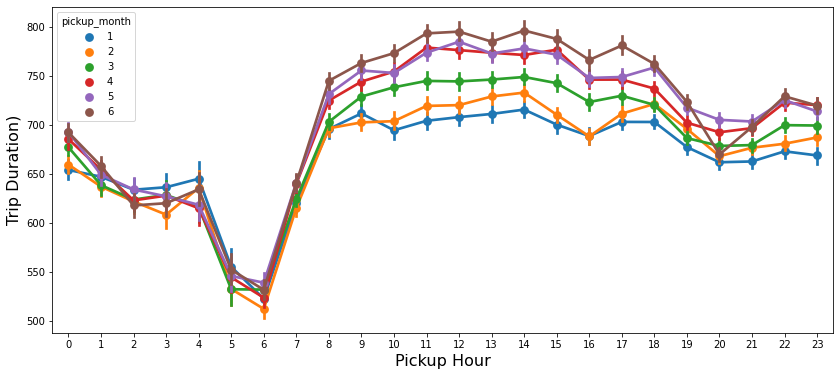

In [ ]:
#Plot showing variation in trip duraion for diffrent pickups for diffrent months 

plt.figure(figsize=(14,6))
sns.pointplot(x='pickup_datetime_hour',y='trip_duration',data=tripduration,hue='pickup_month')
plt.xlabel('Pickup Hour',fontsize=16)
plt.ylabel('Trip Duration)',fontsize=16)

Text(0, 0.5, 'Trip Duration)')

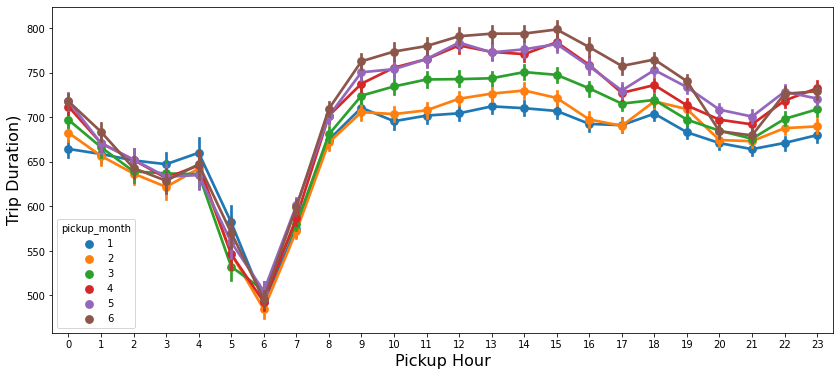

In [ ]:
#Plot showing variation in trip duraion for diffrent dropoffs for diffrent months 

plt.figure(figsize=(14,6))
sns.pointplot(x='dropoff_datetime_hour',y='trip_duration',data=tripduration,hue='pickup_month')
plt.xlabel('Pickup Hour',fontsize=16)
plt.ylabel('Trip Duration)',fontsize=16)

Months only affect duration a little bit ; while pickup hours seems may be infulence that more

### Trip Duration vs Pickup/Dropoff hour for diffrent days of the week 




Text(0, 0.5, 'Trip Duration)')

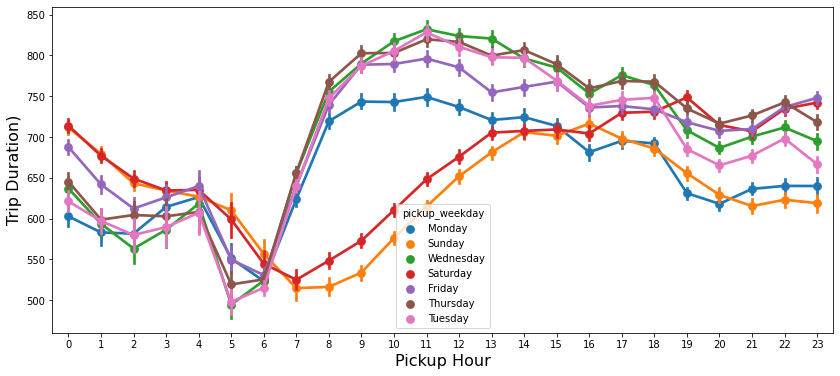

In [ ]:

# Plotting a line graph to represent the change in time duration of trip for diffrent days of the week 

plt.figure(figsize=(14,6))
sns.pointplot(x='pickup_datetime_hour',y='trip_duration',data=tripduration,hue='pickup_weekday')
plt.xlabel('Pickup Hour',fontsize=16)
plt.ylabel('Trip Duration)',fontsize=16)


Text(0, 0.5, 'Trip Duration)')

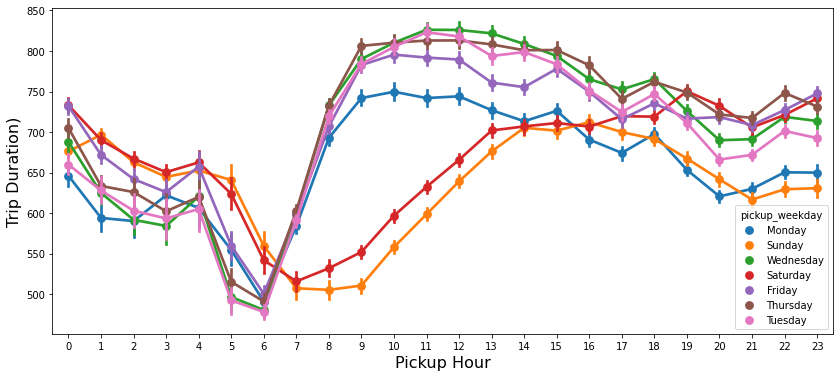

In [ ]:
# Plotting a line graph to represent the change in time duration of trip for diffrent days of the week 

plt.figure(figsize=(14,6))
sns.pointplot(x='dropoff_datetime_hour',y='trip_duration',data=tripduration,hue='pickup_weekday')
plt.xlabel('Pickup Hour',fontsize=16)
plt.ylabel('Trip Duration)',fontsize=16)




*   During the moring rush hours from Monday to Friday ie. 7 AM to 10 AM, maybe owing to traffic jam.


* Duration are high duing wokday (Mon.-Fri.)






In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1242337 entries, 0 to 1354582
Data columns (total 27 columns):
 #   Column                 Non-Null Count    Dtype         
---  ------                 --------------    -----         
 0   id                     1242337 non-null  object        
 1   vendor_id              1242337 non-null  int64         
 2   pickup_datetime        1242337 non-null  datetime64[ns]
 3   dropoff_datetime       1242337 non-null  datetime64[ns]
 4   passenger_count        1242337 non-null  int64         
 5   pickup_longitude       1242337 non-null  float64       
 6   pickup_latitude        1242337 non-null  float64       
 7   dropoff_longitude      1242337 non-null  float64       
 8   dropoff_latitude       1242337 non-null  float64       
 9   store_and_fwd_flag     1242337 non-null  object        
 10  trip_duration          1242337 non-null  int64         
 11  Distance               1242337 non-null  float64       
 12  haversine_distance     12423

In [ ]:
df.select_dtypes(include=['object'])

,id,store_and_fwd_flag,pickup_date,dropoff_date,pickup_weekday,dropoff_weekday,Pick_Up_time,Drop_off_time
0,id2875421,N,2016-03-14,2016-03-14,Monday,Monday,17:24:55,17:32:30
1,id2377394,N,2016-06-12,2016-06-12,Sunday,Sunday,00:43:35,00:54:38
2,id3858529,N,2016-01-19,2016-01-19,Tuesday,Tuesday,11:35:24,12:10:48
3,id3504673,N,2016-04-06,2016-04-06,Wednesday,Wednesday,19:32:31,19:39:40
4,id2181028,N,2016-03-26,2016-03-26,Saturday,Saturday,13:30:55,13:38:10
...,...,...,...,...,...,...,...,...
1354578,id2376096,N,2016-04-08,2016-04-08,Friday,Friday,13:31:04,13:44:02
1354579,id1049543,N,2016-01-10,2016-01-10,Sunday,Sunday,07:35:15,07:46:10
1354580,id2304944,N,2016-04-22,2016-04-22,Friday,Friday,06:57:41,07:10:25
1354581,id2714485,N,2016-01-05,2016-01-05,Tuesday,Tuesday,15:56:26,16:02:39


In [ ]:
categorical_col=['store_and_fwd_flag','pickup_weekday','dropoff_weekday']

In [ ]:
df_train=pd.get_dummies(df, columns = categorical_col,drop_first=True)

In [ ]:
df_train.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,Distance,haversine_distance,manhattan_distance,pickup_date,dropoff_date,pickup_month,dropoff_month,Pick_Up_time,Drop_off_time,pickup_Year,dropoff_Year,pickup_datetime_hour,dropoff_datetime_hour,Avg_speed,store_and_fwd_flag_Y,pickup_weekday_Monday,pickup_weekday_Saturday,pickup_weekday_Sunday,pickup_weekday_Thursday,pickup_weekday_Tuesday,pickup_weekday_Wednesday,dropoff_weekday_Monday,dropoff_weekday_Saturday,dropoff_weekday_Sunday,dropoff_weekday_Thursday,dropoff_weekday_Tuesday,dropoff_weekday_Wednesday
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.98,40.77,-73.96,40.77,455,1.22,0.93,1.08,2016-03-14,2016-03-14,3,3,17:24:55,17:32:30,2016,2016,17,17,9.62,0,1,0,0,0,0,0,1,0,0,0,0,0
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.98,40.74,-74.00,40.73,663,1.33,1.12,1.51,2016-06-12,2016-06-12,6,6,00:43:35,00:54:38,2016,2016,0,0,7.22,0,0,0,1,0,0,0,0,0,1,0,0,0
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.98,40.76,-74.01,40.71,2124,2.10,3.97,5.10,2016-01-19,2016-01-19,1,1,11:35:24,12:10:48,2016,2016,11,12,3.55,0,0,0,0,0,1,0,0,0,0,0,1,0
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.01,40.72,-74.01,40.71,429,0.30,0.92,1.03,2016-04-06,2016-04-06,4,4,19:32:31,19:39:40,2016,2016,19,19,2.49,0,0,0,0,0,0,1,0,0,0,0,0,1
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.97,40.79,-73.97,40.78,435,0.20,0.74,0.75,2016-03-26,2016-03-26,3,3,13:30:55,13:38:10,2016,2016,13,13,1.70,0,0,1,0,0,0,0,0,1,0,0,0,0


In [ ]:
df_train.drop(['id','pickup_datetime','dropoff_datetime','pickup_date','dropoff_date','Pick_Up_time','Drop_off_time'],axis=1,inplace=True)

In [ ]:
df_train

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration,Distance,haversine_distance,manhattan_distance,pickup_month,dropoff_month,pickup_Year,dropoff_Year,pickup_datetime_hour,dropoff_datetime_hour,Avg_speed,store_and_fwd_flag_Y,pickup_weekday_Monday,pickup_weekday_Saturday,pickup_weekday_Sunday,pickup_weekday_Thursday,pickup_weekday_Tuesday,pickup_weekday_Wednesday,dropoff_weekday_Monday,dropoff_weekday_Saturday,dropoff_weekday_Sunday,dropoff_weekday_Thursday,dropoff_weekday_Tuesday,dropoff_weekday_Wednesday
0,2,1,-73.98,40.77,-73.96,40.77,455,1.22,0.93,1.08,3,3,2016,2016,17,17,9.62,0,1,0,0,0,0,0,1,0,0,0,0,0
1,1,1,-73.98,40.74,-74.00,40.73,663,1.33,1.12,1.51,6,6,2016,2016,0,0,7.22,0,0,0,1,0,0,0,0,0,1,0,0,0
2,2,1,-73.98,40.76,-74.01,40.71,2124,2.10,3.97,5.10,1,1,2016,2016,11,12,3.55,0,0,0,0,0,1,0,0,0,0,0,1,0
3,2,1,-74.01,40.72,-74.01,40.71,429,0.30,0.92,1.03,4,4,2016,2016,19,19,2.49,0,0,0,0,0,0,1,0,0,0,0,0,1
4,2,1,-73.97,40.79,-73.97,40.78,435,0.20,0.74,0.75,3,3,2016,2016,13,13,1.70,0,0,1,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354578,2,4,-73.98,40.75,-73.99,40.74,778,0.89,0.76,1.04,4,4,2016,2016,13,13,4.11,0,0,0,0,0,0,0,0,0,0,0,0,0
1354579,1,1,-74.00,40.75,-73.97,40.80,655,2.33,3.76,5.01,1,1,2016,2016,7,7,12.82,0,0,0,1,0,0,0,0,0,1,0,0,0
1354580,2,1,-73.96,40.77,-74.00,40.71,764,3.35,4.86,6.61,4,4,2016,2016,6,7,15.81,0,0,0,0,0,0,0,0,0,0,0,0,0
1354581,1,1,-73.98,40.75,-73.97,40.76,373,0.54,0.68,0.95,1,1,2016,2016,15,16,5.20,0,0,0,0,0,1,0,0,0,0,0,1,0


In [ ]:
from scipy.stats import zscore

In [ ]:
X = df_train.drop('trip_duration',axis=1)
Y = np.log10(df_train['trip_duration'])

In [ ]:
X

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,Distance,haversine_distance,manhattan_distance,pickup_month,dropoff_month,pickup_Year,dropoff_Year,pickup_datetime_hour,dropoff_datetime_hour,Avg_speed,store_and_fwd_flag_Y,pickup_weekday_Monday,pickup_weekday_Saturday,pickup_weekday_Sunday,pickup_weekday_Thursday,pickup_weekday_Tuesday,pickup_weekday_Wednesday,dropoff_weekday_Monday,dropoff_weekday_Saturday,dropoff_weekday_Sunday,dropoff_weekday_Thursday,dropoff_weekday_Tuesday,dropoff_weekday_Wednesday
0,2,1,-73.98,40.77,-73.96,40.77,1.22,0.93,1.08,3,3,2016,2016,17,17,9.62,0,1,0,0,0,0,0,1,0,0,0,0,0
1,1,1,-73.98,40.74,-74.00,40.73,1.33,1.12,1.51,6,6,2016,2016,0,0,7.22,0,0,0,1,0,0,0,0,0,1,0,0,0
2,2,1,-73.98,40.76,-74.01,40.71,2.10,3.97,5.10,1,1,2016,2016,11,12,3.55,0,0,0,0,0,1,0,0,0,0,0,1,0
3,2,1,-74.01,40.72,-74.01,40.71,0.30,0.92,1.03,4,4,2016,2016,19,19,2.49,0,0,0,0,0,0,1,0,0,0,0,0,1
4,2,1,-73.97,40.79,-73.97,40.78,0.20,0.74,0.75,3,3,2016,2016,13,13,1.70,0,0,1,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1354578,2,4,-73.98,40.75,-73.99,40.74,0.89,0.76,1.04,4,4,2016,2016,13,13,4.11,0,0,0,0,0,0,0,0,0,0,0,0,0
1354579,1,1,-74.00,40.75,-73.97,40.80,2.33,3.76,5.01,1,1,2016,2016,7,7,12.82,0,0,0,1,0,0,0,0,0,1,0,0,0
1354580,2,1,-73.96,40.77,-74.00,40.71,3.35,4.86,6.61,4,4,2016,2016,6,7,15.81,0,0,0,0,0,0,0,0,0,0,0,0,0
1354581,1,1,-73.98,40.75,-73.97,40.76,0.54,0.68,0.95,1,1,2016,2016,15,16,5.20,0,0,0,0,0,1,0,0,0,0,0,1,0


In [ ]:
Y

0         2.66
1         2.82
2         3.33
3         2.63
4         2.64
          ... 
1354578   2.89
1354579   2.82
1354580   2.88
1354581   2.57
1354582   2.30
Name: trip_duration, Length: 1242337, dtype: float64

In [ ]:
# Splitting the dataset into the Training set and Test set

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [ ]:
# Transforming data

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Fitting Multiple Linear Regression to the Training set

regressor = LinearRegression()
regressor.fit(X_train, Y_train)

LinearRegression()

In [ ]:
# Predicting the Train set results

Y_pred_train = regressor.predict(X_train)

In [ ]:
y_pred_train

array([2.42762556, 2.73744193, 2.26598544, ..., 2.73835095, 2.85017155,
       2.93039392])

In [ ]:
# Predicting the Test set results

Y_pred_test = regressor.predict(X_test)

In [ ]:
# r2 score of train set

r2_linear_train = r2_score(Y_train, Y_pred_train)

In [ ]:
r2_linear_train

0.7284954240811718

In [ ]:
r2_linear_test = r2_score(Y_test, Y_pred_test)

In [ ]:
r2_linear_test

0.7280996490528686

In [ ]:
MSE  = mean_squared_error(Y_test,Y_pred_test)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2_linear_test = r2_score(Y_test,Y_pred_test)
print("R2 :" ,r2_linear_test)
print("Adjusted R2 : ",1-(1-r2_score(Y_test,Y_pred_test))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 0.021357273244966234
RMSE : 0.14614127837461335
R2 : 0.7280996490528686
Adjusted R2 :  0.7280679103084838


#lasso regression

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
lasso = Lasso()
parameters = {'alpha': [0.8,1,10,20,40,80,100,300,700,1000]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_regressor.fit(X_train, Y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.8, 1, 10, 20, 40, 80, 100, 300, 700,
                                   1000]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.8}

Using  {'alpha': 0.8}  the negative mean squared error is:  -0.07860974250512912


In [ ]:
Y_pred_lasso = lasso_regressor.predict(X_test)

In [ ]:
Y_pred_lasso

array([2.77876917, 2.77876917, 2.77876917, ..., 2.77876917, 2.77876917,
       2.77876917])

In [ ]:
MSE  = mean_squared_error(Y_test,Y_pred_lasso)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2_lasso_test = r2_score(Y_test,Y_pred_lasso)
print("R2 :" ,r2_lasso_test)
print("Adjusted R2 : ",1-(1-r2_score(Y_test,Y_pred_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 0.07854816528133536
RMSE : 0.28026445597209676
R2 : -2.1598362653918457e-08
Adjusted R2 :  -0.00011675092570517798


##Ridge

In [ ]:
# training model

from sklearn.linear_model import Ridge
ridge = Ridge()
parameters = {'alpha': [1,0.001,10,20,35,60,70,100,800,1200]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,Y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1, 0.001, 10, 20, 35, 60, 70, 100, 800,
                                   1200]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.001}

Using  {'alpha': 0.001}  the negative mean squared error is:  -0.021344223147593124


In [ ]:
Y_pred_ridge = ridge_regressor.predict(X_test)

In [ ]:
# evaluating metrics

MSE  = mean_squared_error(Y_test,Y_pred_ridge)
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2_ridge_test = r2_score(Y_test,Y_pred_ridge)
print("R2 :" ,r2_ridge_test)
print("Adjusted R2 : ",1-(1-r2_score(Y_test,Y_pred_lasso))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 0.02135727327155308
RMSE : 0.14614127846557617
R2 : 0.7280996487143903
Adjusted R2 :  -0.00011675092570517798


##Descision tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
decisionTree = DecisionTreeRegressor()

param = {'max_depth' : [1,2,6,7,3]}

gridSearch_decisionTree=GridSearchCV(decisionTree,param,scoring='r2',cv=5)
gridSearch_decisionTree.fit(X_train,Y_train)


best_DecisionTree=gridSearch_decisionTree.best_estimator_
bestDecisionTree_testScore=best_DecisionTree.score(X_test,Y_test)
r2_decision_test = best_DecisionTree.score(X_test,Y_test)

In [ ]:
print(f"The best Decision Tree R2 score is {gridSearch_decisionTree.best_score_} with max depth {gridSearch_decisionTree.best_params_['max_depth']}")
print('\n')
print(f"The best R2 test score is : {bestDecisionTree_testScore} with max depth = {gridSearch_decisionTree.best_params_['max_depth']}")

The best Decision Tree R2 score is 0.9415831944818749 with max depth 7


The best R2 test score is : 0.9421135437544729 with max depth = 7
